### Import the Libraries

In [7]:
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt


### Load the Data 

In [8]:
df = pd.read_csv("Breast_cancer_data.csv")
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [9]:
df.describe()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,1.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   mean_radius      569 non-null    float64
 1   mean_texture     569 non-null    float64
 2   mean_perimeter   569 non-null    float64
 3   mean_area        569 non-null    float64
 4   mean_smoothness  569 non-null    float64
 5   diagnosis        569 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 26.8 KB


In [11]:
Y= df['diagnosis']
Y
X=df.drop(['diagnosis'], axis=1)
(X)

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [12]:
X.shape

(569, 5)

In [13]:
Y.shape

(569,)

### Data Visualization

C:\Users\mehta\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

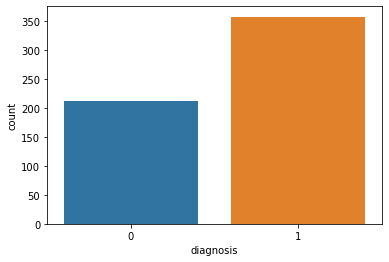

In [14]:
import seaborn as sns
sns.countplot(df['diagnosis'])

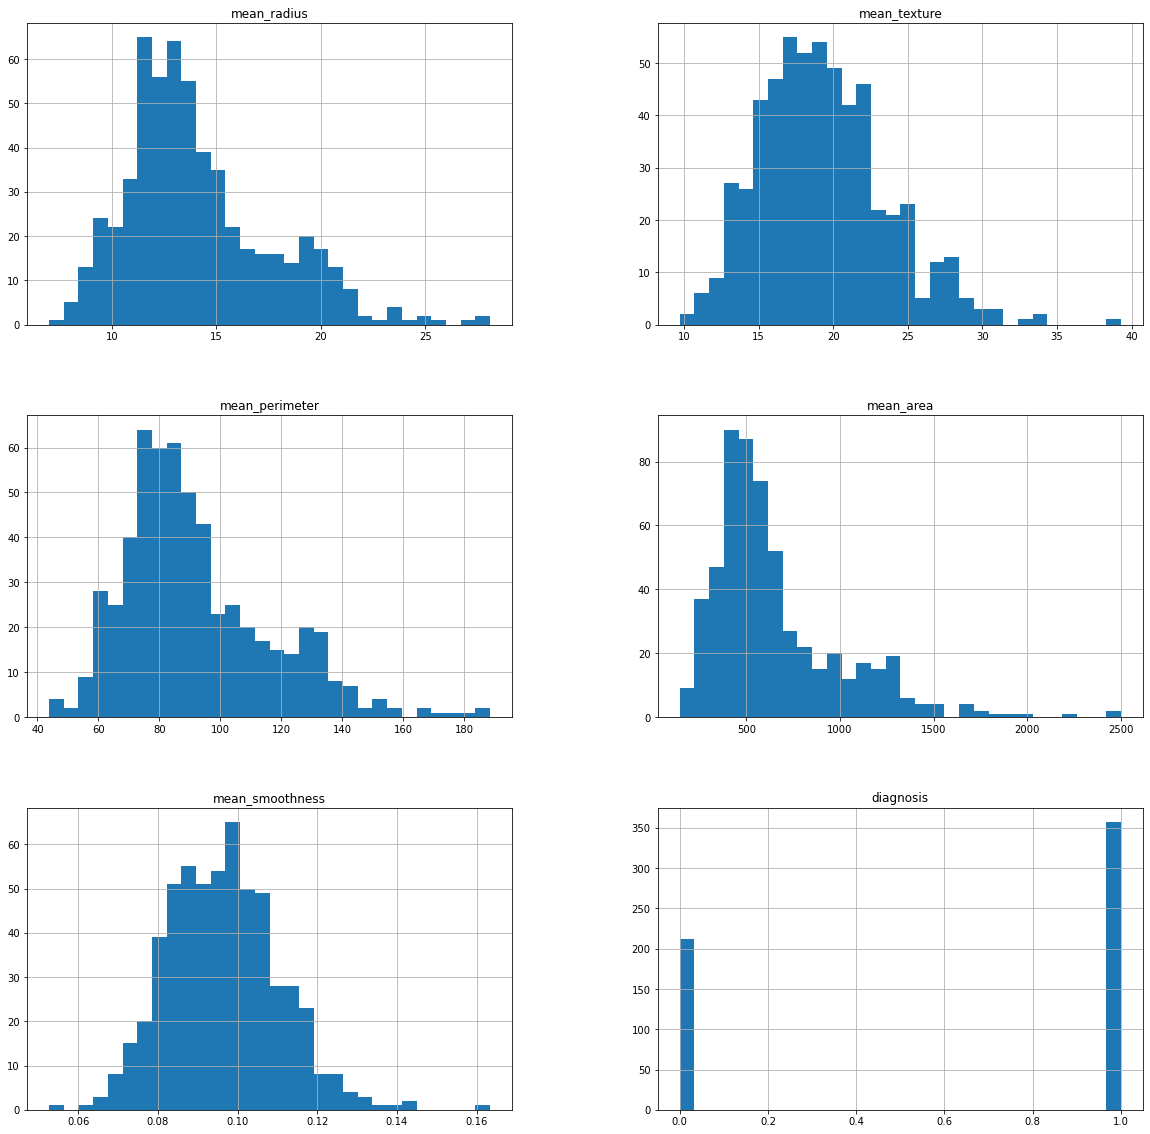

In [15]:
df.hist(bins=30,figsize=(20,20))
plt.show()

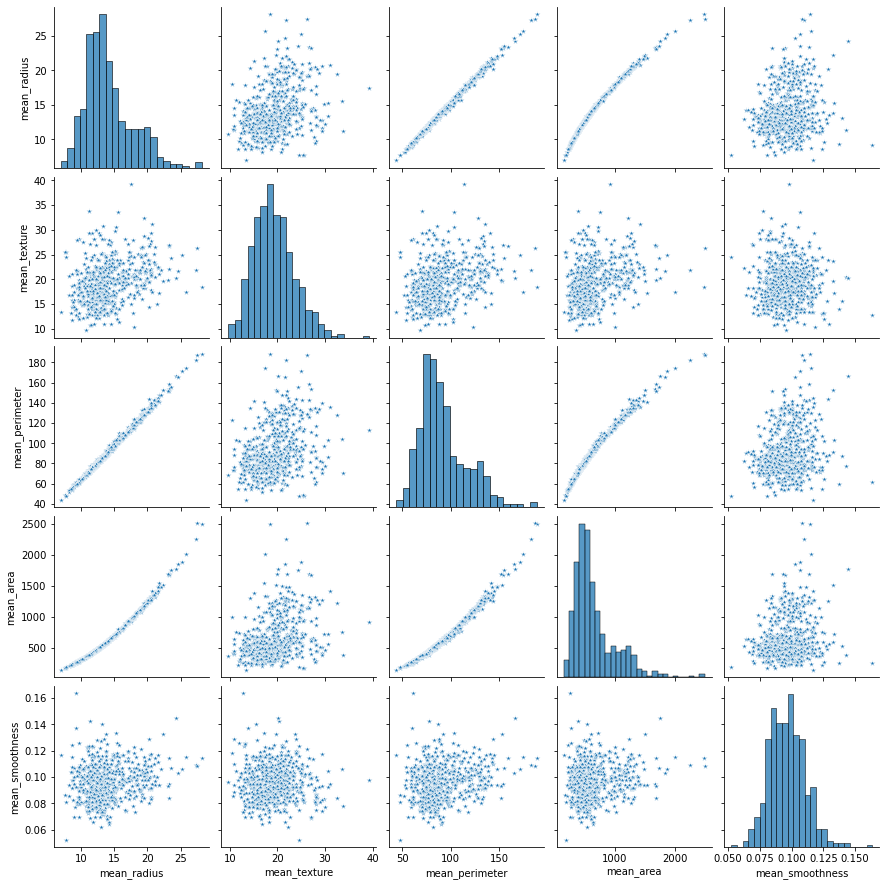

In [16]:
pplot=sns.pairplot(X, markers="*")
print(pplot)

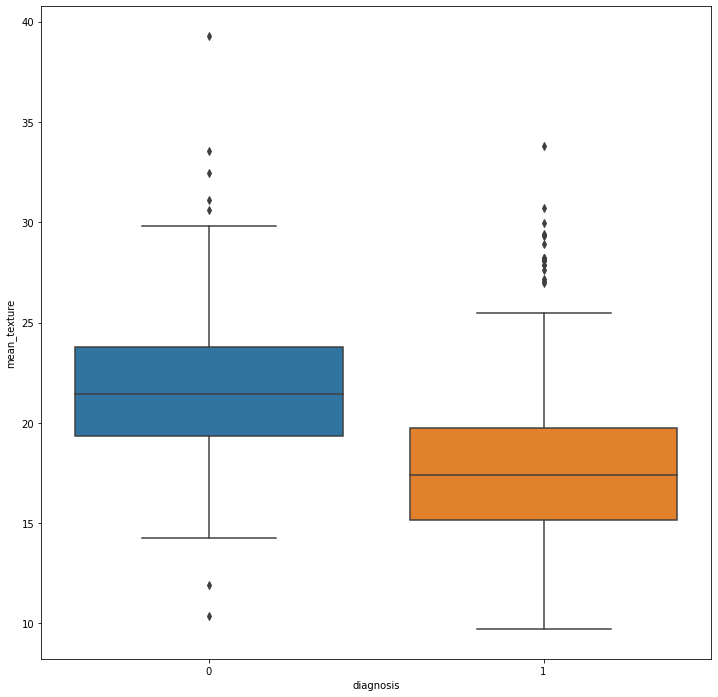

In [17]:
plt.figure(figsize=(12,12))
sns.boxplot(y='mean_texture',x='diagnosis',data=df)
plt.show()

<AxesSubplot:>

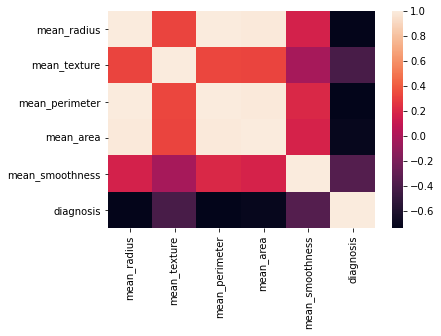

In [18]:
co=df.corr()
sns.heatmap(data=co)

### Train-Test Split 

In [19]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test= train_test_split(X,Y,random_state=0)
print(x_train.shape)

(426, 5)


In [20]:
print(y_train.shape)

(426,)


In [21]:
print(x_test.shape)

(143, 5)


### Model Training

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

linear= LogisticRegression(random_state=0)
linear.fit(x_train,y_train)
l= linear.predict(x_test)
y1=accuracy_score(l,y_test)


In [23]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=5)    
knn.fit(x_train,y_train)
k=knn.predict(x_test)
y2=(accuracy_score(k,y_test))


In [24]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
d= dt.predict(x_test)
y3=accuracy_score(d,y_test)


In [25]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
cl=clf.predict(x_test)
y4=accuracy_score(cl,y_test)


In [26]:
from sklearn import svm

sv = svm.SVC(kernel='linear')
sv.fit(x_train,y_train)
s= sv.predict(x_test)
y5=accuracy_score(s,y_test)


### Model Evaluation

In [27]:
#Accuracy of each model
acc=np.array([y1,y2,y3,y4,y5])
print(acc)

[0.92307692 0.91608392 0.88811189 0.91608392 0.91608392]


In [28]:
print("Accuracy for Logistic regression:")
print(acc[0])
print("Accuracy for K Neighbors Classifier:")
print(acc[1])
print("Accuracy for Decision Tree:")
print(acc[2])
print("Accuracy for Random Forest Classifier:")
print(acc[3])
print("Accuracy for SVM:")
print(acc[4])

Accuracy for Logistic regression:
0.9230769230769231
Accuracy for K Neighbors Classifier:
0.916083916083916
Accuracy for Decision Tree:
0.8881118881118881
Accuracy for Random Forest Classifier:
0.916083916083916
Accuracy for SVM:
0.916083916083916


In [29]:
#Classification Report and F1-Score for Random Forest Classifier model

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

conf=confusion_matrix(y_test,cl)
print(conf)
print("F1 score for random classifier model is:", end=' ')
print(f1_score(cl,y_test))
matrix= classification_report(y_test,cl)
print(matrix)

[[46  7]
 [ 5 85]]
F1 score for random classifier model is: 0.934065934065934
              precision    recall  f1-score   support

           0       0.90      0.87      0.88        53
           1       0.92      0.94      0.93        90

    accuracy                           0.92       143
   macro avg       0.91      0.91      0.91       143
weighted avg       0.92      0.92      0.92       143

